In [1]:
from openai import OpenAI
import random 
import pandas as pd
import re
import matplotlib.pyplot as plt

client = OpenAI(api_key=TOKEN, organization=TOKEN)

In [15]:
n_topicos = 7
tipo_topicos = ["tópico " + str(i) for i in range(n_topicos)]

lista_de_sub_topicos = [
  {
    "Ingestão de dados estruturados, semiestruturados e não estruturados": 1,
    "Ingestão de dados em lote (batch)": 1,
    "Ingestão de dados em streaming": 1,
    "Armazenamento de big data": 1,
    "Conceitos de processamento massivo e paralelo": 1,
    "Processamento distribuído": 1,
    "Soluções de big data: Arquitetura do ecossistema Spark": 1,
    "Arquitetura de cloud computing para ciência de dados (AWS, Azure, GCP)": 1,
  },
{
    "Álgebra relacional e SQL (padrão ANSI)": 1,
    "Banco de dados relacional: SQL Server, PostgreSQL, MySQL": 3,
    "Banco de dados NoSQL": 2,
    "Banco de dados e formatos de arquivo orientado a colunas: Parquet, MonetDB, duckDB": 3,
},
{
    "Contexto de IA: Normalização numérica": 1,
    "Contexto de IA: Discretização": 1,
    "Contexto de IA: Tratamento de dados ausentes": 1,
    "Contexto de IA: Tratamento de outliers e agregações": 1,
    "Contexto de IA: Matching - Tratamento dos dados": 1,
    "Contexto de IA: Deduplicação": 1,
    "Contexto de IA: Data cleansing": 1,
    "Contexto de IA: Enriquecimento": 1,
    "Contexto de IA: Desidentificação de dados sensíveis": 1,
    "Contexto de IA: Algoritmos fuzzy matching e stemming": 1,
},
{
    "Linguagem de programação Scala": 1,
    "Programação funcional": 1,
    "Programação orientada a objetos": 1,
    "R ou Python: Classes de objetos e suas propriedades (vetores, listas, data.frames)": 1,
    "Manipulação e tabulação de dados (numpy, pandas, tidyr,verse, data.table)": 1,
    "Visualização de dados ggplot, matplotlib": 1,
},
{
    "Probabilidade e probabilidade condicional": 1,
    "Independência de eventos, teorema de Bayes e teorema da probabilidade total": 1,
    "Variáveis aleatórias e funções de probabilidade": 1,
    "Principais distribuições de probabilidade discretas e contínuas: distribuição uniforme, distribuição binomial, distribuição Poisson e distribuição normal": 1,
    "Medidas de tendência central e dispersão e correlação": 1,
    "Teorema do limite central": 1,
    "Regra empírica (regra de três sigma) da distribuição normal": 1
},
{
    "Técnicas de classificação: Naive Bayes; Árvores de decisão (algoritmos ID3 e C4.5); Florestas aleatórias (random forest); Máquinas de vetores de suporte (SVM – support vector machines); K vizinhos mais próximos (KNN – K-nearest neighbours)": 1,
    "Avaliação de modelos de classificação: treinamento, teste, validação; validação cruzada; métricas de avaliação - matriz de confusão, acurácia, precisão, revocação, F1-score e curva ROC": 1,
    "Técnicas de regressão: Árvores de decisão para regressão; Máquinas de vetores de suporte para regressão": 1,
    "Ajuste de modelos dentro e fora de amostra e overfitting": 1,
    "Técnicas de agrupamento: Agrupamento por partição, por densidade e hierárquico": 1,
    "Técnicas de redução de dimensionalidade: Seleção de características (feature selection); Análise de componentes principais (PCA – principal component analysis)": 1,
    "Processamento de linguagem natural: Normalização textual - stop words, estemização, lematização e análise de frequência de termos;":1 ,
    "Rotulação de partes do discurso, part-of-speech tagging; Modelos de representação de texto - N-gramas, modelos vetoriais de palavras (CBOW, Skip-Gram e GloVe), modelos vetoriais de documentos (booleano, TF e TF-IDF, média de vetores de palavras e Paragraph Vector);":1, 
    "Métricas de similaridade textual - similaridade do cosseno, distância euclidiana, similaridade de Jaccard, distância de Manhattan e coeficiente de Dice": 1,
    "Redes neurais convolucionais e recorrentes": 1
},
{
    "Diagramas causais: gráficos acíclicos dirigidos; variáveis confundidoras, colisoras e de mediação": 3,
    "Métodos e técnicas de identificação causal: Métodos experimentais RCT e de identificação quase-experimental": 3,
    "Tipos de viés no processo gerador dos dados e soluções: Sampling bias; Selection bias; Attrition bias; Reporting bias; Measurement bias.":3,
    " Modelos probabilísticos gráficos: cadeias de Markov; filtros de Kalman; Redes bayesianas":4,
    " Testes de hipóteses: teste-z; teste-t; valorp; testes para uma amostra; testes de comparação de duas amostras; teste de normalidade (chi square); e intervalos de confiança.": 1
}
]

tipo_questoes = {key: value for key, value in zip(tipo_topicos, lista_de_sub_topicos)}
tipo_questoes

{'tópico 0': {'Ingestão de dados estruturados, semiestruturados e não estruturados': 1,
  'Ingestão de dados em lote (batch)': 1,
  'Ingestão de dados em streaming': 1,
  'Armazenamento de big data': 1,
  'Conceitos de processamento massivo e paralelo': 1,
  'Processamento distribuído': 1,
  'Soluções de big data: Arquitetura do ecossistema Spark': 1,
  'Arquitetura de cloud computing para ciência de dados (AWS, Azure, GCP)': 1},
 'tópico 1': {'Álgebra relacional e SQL (padrão ANSI)': 1,
  'Banco de dados relacional: SQL Server, PostgreSQL, MySQL': 3,
  'Banco de dados NoSQL': 2,
  'Banco de dados e formatos de arquivo orientado a colunas: Parquet, MonetDB, duckDB': 3},
 'tópico 2': {'Contexto de IA: Normalização numérica': 1,
  'Contexto de IA: Discretização': 1,
  'Contexto de IA: Tratamento de dados ausentes': 1,
  'Contexto de IA: Tratamento de outliers e agregações': 1,
  'Contexto de IA: Matching - Tratamento dos dados': 1,
  'Contexto de IA: Deduplicação': 1,
  'Contexto de IA: 

In [154]:
topico_sorteado = random.choices(tipo_topicos)[0]
topico_sorteado

'Contexto de IA: Desidentificação de dados sensíveis'

In [155]:
lista_tema_sorteado = tipo_questoes[topico_sorteado]
lista_tema_sorteado

{'Contexto de IA: Normalização numérica': 1,
 'Contexto de IA: Discretização': 1,
 'Contexto de IA: Tratamento de dados ausentes': 1,
 'Contexto de IA: Tratamento de outliers e agregações': 1,
 'Contexto de IA: Matching - Tratamento dos dados': 1,
 'Contexto de IA: Deduplicação': 1,
 'Contexto de IA: Data cleansing': 1,
 'Contexto de IA: Enriquecimento': 1,
 'Contexto de IA: Desidentificação de dados sensíveis': 1,
 'Contexto de IA: Algoritmos fuzzy matching e stemming': 1}

In [158]:
tema_sorteado = random.choices(list(lista_tema_sorteado.keys()),list(lista_tema_sorteado.values()))[0]
tema_sorteado

'Contexto de IA: Tratamento de dados ausentes'

In [85]:
token = "#####"
tema_sorteado = "Sintaxe da oração e do período"
completion = client.chat.completions.create(
  model="gpt-4-1106-preview",
  messages=[
    {"role": "system", "content": f'''Simule um questão da prova CESGRANRIO. O resultado gerado deve conter 3 partes: a questão, 
                                     a alternativa correta(somente a letra do item) e uma breve explicação dos itens.
                                     o resultado deve ser separado pelo token {token}. As alternativas tem que ser A), B), C), D) ou E).
                                  '''},
    {"role": "user", "content": "Crie uma questão sobre " + tema_sorteado}
  ]
)

In [86]:
resposta_gpt = completion.choices[0].message.content
print(resposta_gpt)

Questão: 
No estudo da gramática normativa da Língua Portuguesa, a análise sintática de um período é fundamental para compreender a função dos elementos que o compõem. Considerando o período "Embora fosse muito esforçado, não conseguiu a aprovação desejada.", assinale a alternativa que identifica corretamente a classificação das orações presentes no período.

A) Oração subordinada adverbial causal e oração principal.
B) Oração subordinada adverbial concessiva e oração principal.
C) Oração subordinada adverbial condicional e oração principal.
D) Oração subordinada adverbial consecutiva e oração principal.
E) Oração subordinada adverbial final e oração principal.

#####

Alternativa correta: B)

#####

Explicação dos itens:

A) Oração subordinada adverbial causal – Esta opção é incorreta porque a relação estabelecida pelo conectivo "Embora" não é de causa, mas de concessão.
B) Oração subordinada adverbial concessiva e oração principal – Esta é a opção correta. O termo "Embora" introduz u

In [70]:
enunciado, resposta_certa, explicacao = resposta_gpt.split(token)
resposta_certa

resposta_certa = re.sub(r"\n| ", "", resposta_certa).upper()
resposta_certa

'E'

In [71]:
dados_cru = {'id': random.randint(0,10000000),
             'topico': topico_sorteado,
             'tema': tema_sorteado,
             'enunciado': enunciado,
             'resposta_certa': resposta_certa,
             'explicacao': explicacao}

In [72]:
# dados_cru = pd.DataFrame(dados_cru, index=[0])
# data_cru = pd.read_csv('dados_cru.csv', index_col=False)

In [73]:
# data_cru = pd.concat([data_cru, dados_cru])
# data_cru.to_csv('dados_cru.csv', index=False)

In [13]:
data = pd.read_csv('dados_cru.csv')
data

,topico,tema,enunciado,resposta_certa,explicacao,id
0,tópico 2,Deduplicação,Questão:\nA tecnologia de deduplicação é ampla...,B,B,0
1,tópico 5,Processamento de linguagem natural: Normalizaç...,Questão:\nA análise de textos por meio de técn...,d,\n\nExplicação dos itens:\n\nI. Verdadeiro. A ...,1
2,tópico 3,Programação funcional,"Questão:\n\nNa programação funcional, uma funç...",B,\n\nExplicação:\n\nA) Incorreta. Funções puras...,2
3,tópico 1,"Banco de dados relacional: SQL Server, Postgre...",Questão:\nUm administrador de banco de dados p...,B,\n\nExplicação dos itens:\n\nA) Criar índices ...,739371
4,tópico 1,"Banco de dados relacional: SQL Server, Postgre...",Questão: Considerando os sistemas de gerenciam...,E,\n\nExplicação dos itens:\n\nA) Incorrecto. Tr...,3760240
...,...,...,...,...,...,...
653,tópico 4,"Independência de eventos, teorema de Bayes e t...",Questão: \n\nEm um processo de seleção para um...,C,\n\nExplicação dos itens:\n\nA) 70% - Incorret...,6684329
654,tópico 4,Probabilidade e probabilidade condicional,Questão: \n\nUma companhia de vendas online re...,ALTERNATIVACORRETA:A,\n\nBreve Explicação dos Itens:\n\nA) A proba...,6359313
655,tópico 4,Principais distribuições de probabilidade disc...,Questão: Uma empresa de entrega de encomendas ...,C,\n\nA alternativa correta é C) Distribuição Po...,9729081
656,tópico 4,Medidas de tendência central e dispersão e cor...,Questão:\nA análise de regressão é uma ferrame...,B,\n\nExplicação dos itens:\n\nI - A afirmação é...,5585205


In [9]:
data.iloc[244:,:]['tema'].value_counts()

Arquitetura de cloud computing para ciência de dados (AWS, Azure, GCP)                                                                                                                                                                             15
Processamento distribuído                                                                                                                                                                                                                          15
Ingestão de dados em lote (batch)                                                                                                                                                                                                                  15
Conceitos de processamento massivo e paralelo                                                                                                                                                                                                      15
Soluções de big 

In [25]:
# indices = []
# for key, value in enumerate(data['resposta_certa']):
#   if(len(value) > 1):
#     indices.append(key)

# print(indices)

[]


In [23]:
# ind = 654
# data.loc[ind,"resposta_certa"]

'ALTERNATIVACORRETA:A'

In [24]:
# data.loc[ind,"resposta_certa"] = "A"

In [26]:
# data.to_csv('dados_cru.csv', index=False)

In [30]:
# data = pd.read_csv('dados_respondidos.csv')
# data = data.drop(axis=0, labels=[0,1])

# data.to_csv('dados_respondidos.csv',index=False)

In [2]:
data = pd.read_csv('dados_respondidos.csv')
data

,topico,tema,enunciado,resposta_certa,explicacao,resposta_user,id,ano,mes,dia,dificuldade
0,tópico 1,"Banco de dados relacional: SQL Server, Postgre...",Questão:\nUm administrador de banco de dados p...,B,\n\nExplicação dos itens:\n\nA) Criar índices ...,A,739371,0,0,0,0
1,tópico 1,"Banco de dados relacional: SQL Server, Postgre...",Questão: Considerando os sistemas de gerenciam...,E,\n\nExplicação dos itens:\n\nA) Incorrecto. Tr...,D,3760240,0,0,0,0
2,tópico 5,Técnicas de classificação: Naive Bayes; Regres...,Questão: Uma empresa de telecomunicações desej...,E,\n\nA alternativa E é a correta. A técnica de ...,C,3729591,0,0,0,0
3,tópico 4,Medidas de tendência central e dispersão e cor...,"Questão:\n\nNa análise estatística de dados, é...",C,\n\nExplicação dos itens:\n\nA) A média calcul...,C,1339126,0,0,0,0
4,tópico 3,Linguagem de programação Scala,Questão: \nConsiderando os paradigmas de progr...,C,\n\n Item I está incorreto porque a palavra-ch...,B,2601899,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
596,tópico 1,"Banco de dados relacional: SQL Server, Postgre...",Questão: No contexto de otimização de consulta...,C,"\n\nA alternativa A está incorreta pois, embo...",B,4655572,2024,2,9,2
597,tópico 6,Diagramas causais: gráficos acíclicos dirigido...,Questão: Em um estudo sobre os efeitos de um n...,A,\n\nExplicação dos itens:\n\nA) Dieta equilibr...,D,8888136,2024,2,9,1
598,tópico 2,Contexto de IA: Desidentificação de dados sens...,Questão: No contexto da Inteligência Artificia...,E,\n\nExplicação dos itens:\n\nA) Anonimização r...,C,2252949,2024,2,9,1
599,tópico 5,Técnicas de classificação: Naive Bayes; Árvore...,Questão: Em um cenário de aprendizado de máqui...,E,\n\nA alternativa correta é E) Naive Bayes. N...,E,1650100,2024,2,13,1


In [12]:
data[(data['dificuldade'] == "1") * (data['resposta_certa'] != data['resposta_user'])] 

,topico,tema,enunciado,resposta_certa,explicacao,resposta_user,id,ano,mes,dia,dificuldade
51,tópico 2,Algoritmos fuzzy matching e stemming,Questão:\n\nA técnica de algoritmos fuzzy matc...,D,\n\nExplicação dos itens:\n\nI. Correto. O alg...,C,9795622,2024,2,14,1
170,tópico 2,Contexto de IA: Desidentificação de dados sens...,Questão: No contexto de Inteligência Artificia...,E,\nExplicação dos itens:\n\nA) Pseudonimização ...,D,2580580,2024,2,13,1
248,tópico 6,Tipos de viés no processo gerador dos dados e ...,Questão:\n\nA qualidade da pesquisa científica...,B,\n\nExplicação dos itens:\n\nA) Sampling bias ...,D,6212204,2024,2,13,1
329,tópico 0,Armazenamento de big data,Questão: No contexto de sistemas distribuídos ...,B,\n\nExplicação dos itens:\n\nI - O HDFS não ap...,E,6643734,2024,2,13,1
362,tópico 5,"modelos vetoriais de documentos (booleano, TF ...",Questão: Na área de Recuperação de Informações...,B,"\n\nExplicação dos itens:\n\nA) Incorreta, poi...",D,4615026,2024,1,31,1
...,...,...,...,...,...,...,...,...,...,...,...
583,tópico 0,Processamento distribuído,Questão: A implementação de sistemas de proces...,C,\n\nExplicação dos itens:\n\nI - Correta. O mo...,E,5490937,2024,2,9,1
584,tópico 5,Técnicas de classificação: Naive Bayes; Árvore...,"Questão:\n\nEm aprendizado de máquina, diversa...",B,\n\nExplicação dos itens:\n\nI - Correto. Naiv...,A,4216241,2024,2,9,1
589,tópico 1,"Banco de dados relacional: SQL Server, Postgre...",Questão: A respeito do planejamento e da execu...,E,\n\nExplicação dos itens:\n\nI. A afirmativa é...,D,2499536,2024,2,9,1
597,tópico 6,Diagramas causais: gráficos acíclicos dirigido...,Questão: Em um estudo sobre os efeitos de um n...,A,\n\nExplicação dos itens:\n\nA) Dieta equilibr...,D,8888136,2024,2,9,1


In [54]:
data[data['topico'] == "tópico 5"]

print(data.loc[252,"enunciado"])

Questão:
A recuperação de informação em grandes repositórios de dados envolve a utilização de modelos para representar documentos de maneira que a computação de semelhanças e relevâncias entre eles e as consultas dos usuários seja viável. Os modelos vetoriais de documentos têm sido amplamente utilizados para essa finalidade, cada um com suas características e aplicações. Considerando os modelos Booleano, TF (Term Frequency), TF-IDF (Term Frequency-Inverse Document Frequency), Média de Vetores de Palavras e Paragraph Vector, é INCORRETO afirmar que:

A) O modelo Booleano opera sob o princípio de lógica binária, onde os termos presentes no documento são representados por 1 e os ausentes por 0, sem levar em conta a frequência do termo no documento.
B) O modelo TF-IDF pondera o número de vezes que um termo aparece no documento (TF) com a inversa da frequência do termo nos documentos do corpus (IDF), aumentando a importância de termos menos comuns nos documentos.
C) O modelo de Média de Vet

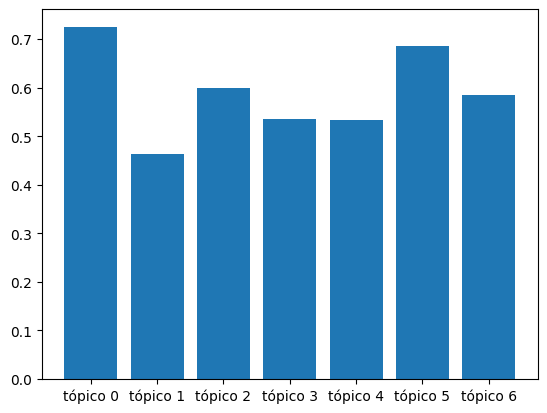

In [3]:
resultados = {'topicos':data['topico'], 
             'acertos':data['resposta_user'] == data['resposta_certa']}

resultados = pd.DataFrame(resultados)

acertos = resultados.groupby('topicos')['acertos'].sum()
total_questoes = pd.DataFrame(resultados['topicos'].value_counts())

union_df = pd.concat([acertos, total_questoes], axis=1)
union_df['proporcao_acertos'] = union_df['acertos']/union_df['topicos']

plt.bar(union_df.index, union_df['proporcao_acertos'])
plt.show()

In [4]:
total_questoes

,topicos
tópico 5,165
tópico 0,153
tópico 1,93
tópico 6,77
tópico 3,43
tópico 2,40
tópico 4,30


In [6]:
proporcao_inversa = (1/union_df['proporcao_acertos'])
pesos = [3,1,0.6,1,1,1]

proporcao_inversa = proporcao_inversa*pesos

(proporcao_inversa)/sum(proporcao_inversa)

ValueError: operands could not be broadcast together with shapes (7,) (6,) 

In [5]:
(1/union_df['proporcao_acertos'])/sum(1/union_df['proporcao_acertos'])

tópico 0    0.113693
tópico 1    0.178394
tópico 2    0.137472
tópico 3    0.154208
tópico 4    0.154656
tópico 5    0.120440
tópico 6    0.141138
Name: proporcao_acertos, dtype: float64

In [8]:
a = data['tema'].value_counts()
a.index
a.value_counts

{x:y for x,y in zip(a.index, a)}

{'Banco de dados NoSQL': 29,
 'Soluções de big data: Arquitetura do ecossistema Spark': 24,
 'Banco de dados relacional: SQL Server, PostgreSQL, MySQL': 23,
 'Ingestão de dados em lote (batch)': 23,
 'Banco de dados e formatos de arquivo orientado a colunas: Parquet, MonetDB, duckDB': 20,
 'Conceitos de processamento massivo e paralelo': 19,
 'Arquitetura de cloud computing para ciência de dados (AWS, Azure, GCP)': 18,
 'Métodos e técnicas de identificação causal: Métodos experimentais RCT e de identificação quase-experimental': 18,
 'Tipos de viés no processo gerador dos dados e soluções: Sampling bias; Selection bias; Attrition bias; Reporting bias; Measurement bias.': 17,
 'Ingestão de dados em streaming': 17,
 'Diagramas causais: gráficos acíclicos dirigidos; variáveis confundidoras, colisoras e de mediação': 17,
 'Técnicas de regressão: Árvores de decisão para regressão; Máquinas de vetores de suporte para regressão': 15,
 'Técnicas de redução de dimensionalidade: Seleção de carac